<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


Text(0.5, 0.98, '')

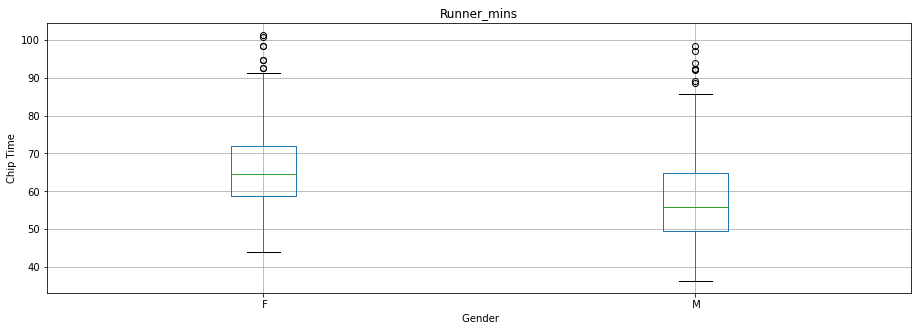

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

soup = BeautifulSoup(html, 'lxml')
type(soup)

# Get the title
title = soup.title
print(title)

# Print out the text
text = soup.get_text()
#print(soup.text)

#all_links = soup.find_all("a")
#for link in all_links: 
#    print(link.get("href"))
    
rows = soup.find_all('tr')
#print(rows[:10])

for row in rows: 
    row_td = row.find_all('td')
#print(row_td)
#type(row_td)

str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
#print(cleantext)

list_rows = []
for row in rows: 
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<[^A-Z](.*?)>')
    clean2 = (re.sub(clean, '', str_cells))
    #m = re.search('[^A-Z]*(.*?)', clean2)
    
    #run above through regex to strip formatting tags
    #clean3 = m.group(0) #redo to make new str to append 
    list_rows.append(clean2)
#print(clean2)
#print(clean3)
#type(clean3)

df = pd.DataFrame(list_rows)
df.head(10)

df1 = df[0].str.split(',', expand=True)
df1.head(10)

df1[0] = df1[0].str.strip('[')
df1.head(10)

col_labels = soup.find_all('th')

all_header = []
col_str = str(col_labels) 
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
#print(all_header)

df2 = pd.DataFrame(all_header)
df2.head()
df3 = df2[0].str.split(',', expand=True)
df3.head()
frames = [df3, df1]
df4 = pd.concat(frames) 
df4.head(10)

df5 = df4.rename(columns=df4.iloc[0])
df5.head()

#df5.info()
df5.shape

df6 = df5.dropna(axis=0, how='any')
#df6.info()
df6.shape

df7 = df6.drop(df6.index[0])
#df7.head()

df7[' Name'] = df7[' Name'].str.lstrip()
df7[' Name'] = df7[' Name'].str.rstrip()
df7[' Team]'] = df7[' Team]'].str.lstrip()
df7[' Team]'] = df7[' Team]'].str.rstrip()

df7.head()

df7.rename(columns={'[Place': 'Place'}, inplace=True)
df7.rename(columns={' Team]': 'Team'}, inplace= True)
df7.head()

df7['Team'] = df7['Team'].str.strip(']')
df7.head()

time_list = df7[' Chip Time'].tolist()

time_mins = [] 
for i in time_list: 
    if i.count(':') == 1: 
        m, s = i.split(':')
        math = (int(m) * 60 + int(s))/60
    else:
        h, m, s = i.split(':')
        math = (int(h) * 3600 + int(m) * 60 + int(s))/60
        math = float(math)
    time_mins.append(math)


df7['Runner_mins'] = time_mins
df7.head()

#df7.describe(include=[np.number])

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

#df7.boxplot(column='Runner_mins')
#plt.grid(True, axis='y')
#plt.ylabel('Chip Time')
#plt.xticks([1], ['Runners'])

#x = df7['Runner_mins']
#ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor' : 'black'}) 
#plt.show()

f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
#sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
#sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')

#g_stats =df7.groupby(" Gender", as_index=True).describe()
#print(g_stats)

df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")